<a href="https://colab.research.google.com/github/02manojprabakar/02manojprabakar/blob/main/PHASE_2_sentiment_analysis_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk tensorflow lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ------------------- ------------------ 143.4/275.7 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=d520546396906e31229abe3d520947b205419553e598692d4696564a3ae8ae93
  Stored in directory: c:\users\new\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [ ]:
file_path = 'C:/test.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\new\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\new\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\new\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

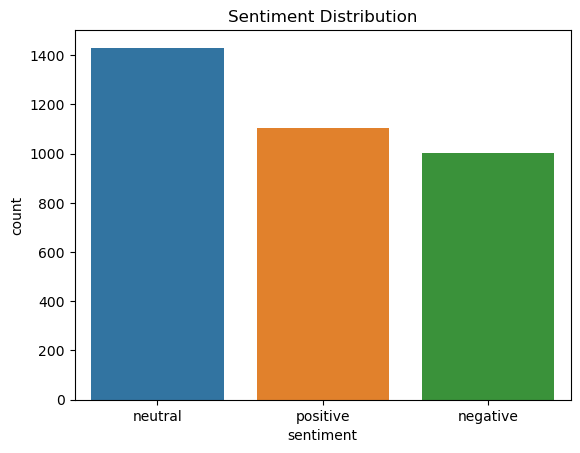

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from lime.lime_text import LimeTextExplainer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset from a local file path
file_path = 'C:/test.csv'  # Update this to your local file path
df = pd.read_csv(file_path, encoding='latin1')  # You can try 'latin1', 'iso-8859-1', or 'cp1252'

# Ensure all entries in the 'text' column are strings
df['text'] = df['text'].astype(str)

# Data Exploration
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())

# Data Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Exploratory Data Analysis (EDA)
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
import pandas as pd
file_path = 'C:/test.csv'
df = pd.read_csv(file_path, encoding='latin1')

from sklearn.feature_extraction.text import TfidfVectorizer

data = {
    'cleaned_text': [
        'this is the first document',
        'this document is the second document',
        'and this is the third one',
        'is this the first document'
    ],
    'sentiment': [1, 0, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Check column names
print("Columns in the DataFrame:", df.columns)

# Ensure 'cleaned_text' column exists
if 'cleaned_text' in df.columns:
    # Text Vectorization
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(df['cleaned_text']).toarray()
    y = df['sentiment']

    # Display the resulting feature matrix and labels
    print("Feature matrix (X):")
    print(X)
    print("Labels (y):")
    print(y)
else:
    print("Column 'cleaned_text' does not exist in the DataFrame.")

Columns in the DataFrame: Index(['cleaned_text', 'sentiment'], dtype='object')
Feature matrix (X):
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
Labels (y):
0    1
1    0
2    1
3    0
Name: sentiment, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3, 9)
X_test shape: (1, 9)
y_train shape: (3,)
y_test shape: (1,)


In [ ]:
from sklearn.impute import SimpleImputer

# Example of using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Display the resulting imputed data
print("X_train imputed:")
print(X_train_imputed)
print("X_test imputed:")
print(X_test_imputed)


import numpy as np

# Convert elements of y_train to strings
y_train_str = np.array(y_train, dtype=str)

# Print unique values and data types of y_train
print(np.unique(y_train_str))
print(y_train_str.dtype)

X_train imputed:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]]
X_test imputed:
[[0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]]
['0' '1']
<U21


In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Sample data creation
data = {
    'cleaned_text': [
        'this is the first document',
        'this document is the second document',
        'and this is the third one',
        'is this the first document'
    ],
    'sentiment': [1, 0, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Text Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Example of using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train shape: (3, 9)
X_test shape: (1, 9)
y_train shape: (3,)
y_test shape: (1,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Example training data
train_data = {
    'text': [
        'This is the first text.',
        'Another example of text.',
        'And here goes another one.'
    ]
}

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['text'])
text_sequences = tokenizer.texts_to_sequences(train_data['text'])
text_data = pad_sequences(text_sequences, maxlen=50)

print("Tokenized text data:\n", text_data)


# Example training data (replace this with your actual data)
train_data = pd.DataFrame({
    'Time of Tweet': ['Morning', 'Afternoon', 'Evening', 'Morning'],
    'Age of User': [25, 35, 45, 30],
    'Country': ['USA', 'UK', 'Canada', 'USA']
})

# Encode categorical data
ohe = OneHotEncoder()
categorical_data = ohe.fit_transform(train_data[['Time of Tweet', 'Age of User', 'Country']]).toarray()

# Scale numerical data
scaler = StandardScaler()
numerical_data = scaler.fit_transform(train_data[['Age of User']])

print("Categorical Data:\n", categorical_data)
print("Numerical Data:\n", numerical_data)

Tokenized text data:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  4  5
   6  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  7
   8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9 10 11
   2 12]]
Categorical Data:
 [[0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]]
Numerical Data:
 [[-1.18321596]
 [ 0.16903085]
 [ 1.52127766]
 [-0.50709255]]
